<a href="https://colab.research.google.com/github/charlesaurav13/DeepLearning/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
!pip install emnist

In [5]:
from emnist import extract_training_samples, extract_test_samples

# Load training data
X_train, y_train = extract_training_samples('digits')
X_test, y_test = extract_test_samples('digits')

In [6]:
from sklearn.model_selection import train_test_split
# Split test data into validation and test data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.7, random_state=42)
# Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)

Build the model


In [18]:
model = Sequential([
    layers.Conv2D(32, (3, 3),activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.65),
    layers.Dense(10, activation='softmax')  # 10 classes for digits (0-9)
])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=12, batch_size=1003)

Epoch 1/12
240/240 [==============================] - 9s 26ms/step - loss: 0.9372 - accuracy: 0.7124 - val_loss: 0.0810 - val_accuracy: 0.9776
Epoch 2/12
240/240 [==============================] - 6s 25ms/step - loss: 0.1168 - accuracy: 0.9723 - val_loss: 0.0630 - val_accuracy: 0.9832
Epoch 3/12
240/240 [==============================] - 6s 26ms/step - loss: 0.0811 - accuracy: 0.9808 - val_loss: 0.0511 - val_accuracy: 0.9869
Epoch 4/12
240/240 [==============================] - 5s 20ms/step - loss: 0.0664 - accuracy: 0.9845 - val_loss: 0.0462 - val_accuracy: 0.9889
Epoch 5/12
240/240 [==============================] - 4s 18ms/step - loss: 0.0573 - accuracy: 0.9867 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 6/12
240/240 [==============================] - 5s 20ms/step - loss: 0.0504 - accuracy: 0.9883 - val_loss: 0.0410 - val_accuracy: 0.9901
Epoch 7/12
240/240 [==============================] - 4s 18ms/step - loss: 0.0460 - accuracy: 0.9892 - val_loss: 0.0432 - val_accuracy: 0.9897

In [25]:
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)

Evaluating on test data...
875/875 [==============================] - 3s 3ms/step - loss: 0.0372 - accuracy: 0.9905
Test Loss: 0.0372
Test Accuracy: 0.9905
875/875 [==============================] - 2s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2749
           1       1.00      0.99      0.99      2815
           2       0.99      0.99      0.99      2830
           3       1.00      0.99      0.99      2775
           4       0.99      0.99      0.99      2829
           5       0.99      0.99      0.99      2770
           6       0.99      1.00      0.99      2766
           7       0.98      0.99      0.99      2819
           8       0.99      0.98      0.99      2788
           9       0.99      0.99      0.99      2859

    accuracy                           0.99     28000
   macro avg       0.99      0.99      0.99     28000
weighted avg       0.99      0.99      0.99     28000



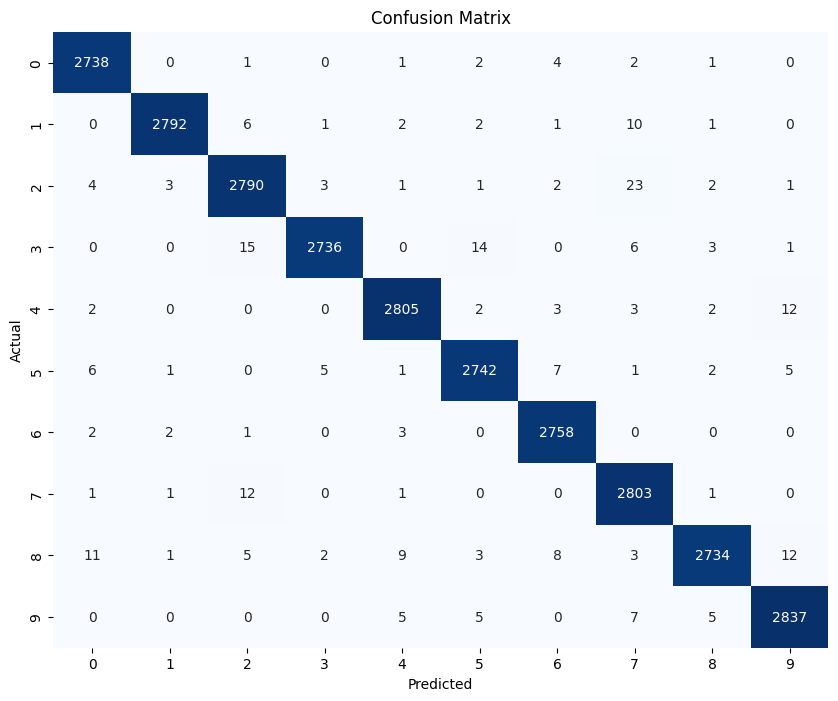

In [32]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot training and validation accuracy

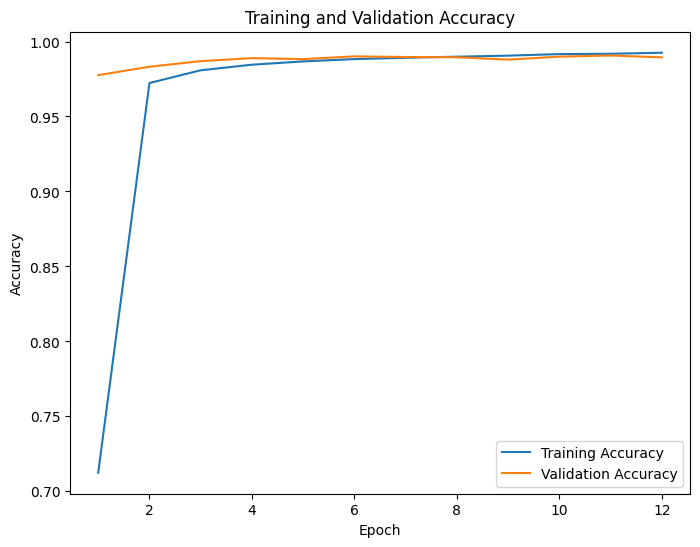

In [33]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 13), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 13), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

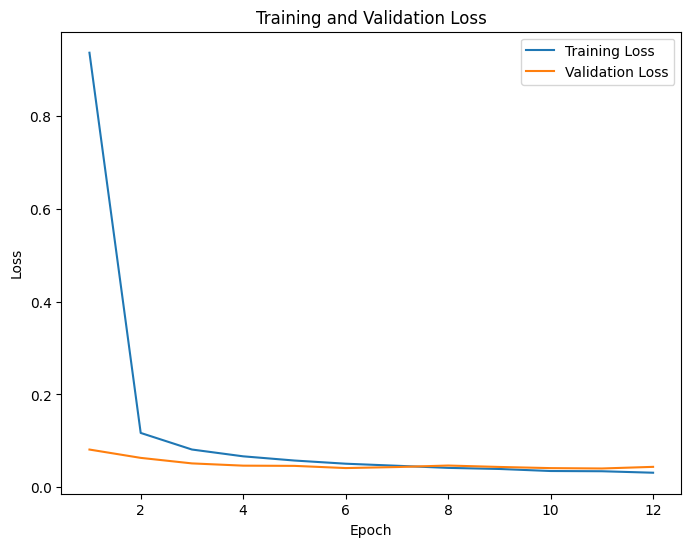

In [35]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 13), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 13), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Get the list of layers in the model
layers = model.layers

# Loop through the layers and print the weights and biases if available
for i, layer in enumerate(layers):
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]
        biases = layer.get_weights()[1]
        print(f"Layer {i + 1} Weights:\n{weights}")
        print(f"Layer {i + 1} Biases:\n{biases}")
        print("--------------------------")
    else:
        print(f"Layer {i + 1} has no trainable weights or biases.")
        print("--------------------------")

In [38]:
model.save('digits.h5')

In [39]:
# Save the model to a specific directory
model.save('/content/drive/MyDrive/Colab Notebooks/digits.h5')